In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm

#import pandas as pd

from IPython.display import clear_output

from sklearn.datasets import make_circles
import scipy as sc

#from tqdm import tqdm
import time

In [2]:
NSamples = 50
NFeatures = 2
XTrain, YTrain = make_circles(n_samples=NSamples,factor=0.5,noise=0.04)
YTrain = YTrain[:,np.newaxis]
XTest, YTest = make_circles(n_samples=NSamples, factor=0.5,noise=0.07)
YTest = YTest[:,np.newaxis]

In [3]:
print(XTrain.shape,YTrain.shape)
print(XTest.shape,YTest.shape)

((50, 2), (50, 1))
((50, 2), (50, 1))


In [4]:
def GetFig(X,Y):
    plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], c='skyblue')
    plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], c='salmon')
    plt.show()

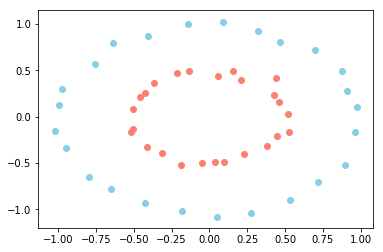

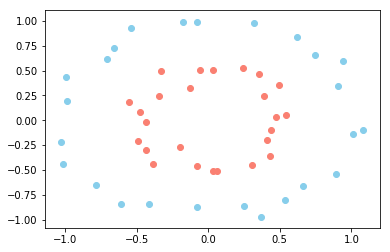

In [5]:
GetFig(XTrain,YTrain)
GetFig(XTest,YTest)

# Vamos a crear el perceptron

In [6]:
# Funcion de activacion [0] Derivada de la funcion de activacion [1]
sigm = ( lambda x: 1/(1+np.exp(-x)),
         lambda x: x*(1-x) )
relu = ( lambda x: np.maximum(0., x),
         lambda x: np.piecewise(x, [x < 0., x >=0.], [0.,1.]))

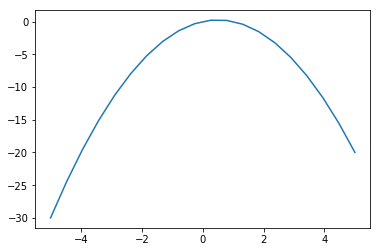

In [7]:
x = np.linspace(-5,5,20)
plt.plot(x,sigm[1](x))

In [8]:
class Layer():
    
    def __init__(self, NConnections, NNeurons, ActivationFunc):
        
        self.ActivationFunc = ActivationFunc
        
        # Inicializar pesos y bias 
        
        self.b = np.random.rand(1,NNeurons)*2-1
        
        self.W = np.random.rand(NConnections,NNeurons)*2 - 1.

$$ \vec{a}^{L} = f( \vec{b} + \vec{I}\cdot \vec{W}  ) $$

In [9]:
# Vamos a crear capaz
L0 = Layer(2,3,sigm)
L1 = Layer(3,5,sigm)
L2 = Layer(5,1,sigm)

In [10]:
Salida0 = sigm[0](L0.b + np.dot(XTrain[0,:],L0.W))
print(Salida0)

[[0.39439472 0.62013055 0.44991227]]


In [11]:
print(L1.W)

[[ 0.10758055  0.95283657 -0.00743579 -0.49908311  0.91920997]
 [ 0.7694721  -0.77175549 -0.60919291 -0.28591604 -0.202654  ]
 [-0.55044068  0.77432563 -0.73507839 -0.19536591  0.05776657]]


In [12]:
Salida1 = sigm[0](L1.b + np.dot(Salida0,L1.W))
print(Salida1)

[[0.63173405 0.38588224 0.46958446 0.21872036 0.70503521]]


In [13]:
Salida2 = sigm[0](L2.b + np.dot(Salida1,L2.W))
print(Salida2)

[[0.54338216]]


# Generalicemos la topologia de la Red

In [14]:
def Perceptron(Topology, ActivationFunc):
    
    NN = []
    
    for l, layer in enumerate(Topology[:-1]):
        
        NN.append(Layer(Topology[l],Topology[l+1],ActivationFunc[l+1]))
        
    return NN

In [16]:
#MyTopology = [NFeatures, 4, 8, 1]
MyTopology = [NFeatures, 5,10,4 , 1]

Activations = [sigm, sigm, sigm, sigm, sigm]

Perceptron1 = Perceptron(MyTopology, Activations)

In [17]:
#print(Perceptron1[1].W)

# Necesitamos una función de Costo (Métrica)
## Error cuadrático Medio

In [18]:
Cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
        lambda Yp, Yr: Yp-Yr)

In [19]:
def Predict(Perceptron, XTrain, train=True):
    
    # Guardamos la suma ponderada de cada capa y sus activaciones
    out = [(None,XTrain)]
    
    # Forward Pass
    for l, layer in enumerate(Perceptron):
        
        z = np.dot(out[-1][1],Perceptron[l].W+Perceptron[l].b)
        a = Perceptron[l].ActivationFunc[0](z)
        
        out.append((z,a))
        
    if train:
        return out
    else:
        return out[-1][1]

In [20]:
OutPerceptron = Predict(Perceptron1,XTrain[0,:],train=False)
print(OutPerceptron)

[0.1805592]


# Para entrenar la red usamos backpropagation

Error ultima capa
$$ \delta^{L} = \frac{\partial C}{\partial a^{L}} \frac{\partial a^{L}}{\partial z^{L}} $$ 

$$ \delta^{l-1} = \delta^{l} W^{l} \frac{\partial a^{l-1}}{\partial z^{l-1}}$$

In [21]:
def Train(Perceptron,XTrain,YTrain,Cost,gamma):
    
    delta = []
    
    # Forward Pass
    out = Predict(Perceptron,XTrain)
    
    # Recordar que la primera capa no esta en out
    # usar l+1 si arranca en cero
    
    # For loop hacia atras
    # Backward pass
    for l in reversed(range(0,len(Perceptron))):
        
        z = out[l+1][0] # Salidas hacia atras de las sumas
        a = out[l+1][1] # Salidas hacia atras de las activaciones
        
        # Error en la ultima capa
        if l == len(Perceptron) -1:
            # Derivada del Costo en a
            # Derivada de la activacion en a
            delta.insert(0,Cost[1](a,YTrain)*Perceptron[l].ActivationFunc[1](a))
        else:
            delta.insert(0, np.dot(delta[0],Wt.T)*Perceptron[l].ActivationFunc[1](a))
        
        Wt = Perceptron[l].W
        
        # Gradient Descent
        Perceptron[l].b -= gamma*np.mean(delta[0], axis=0, keepdims=True)
        Perceptron[l].W -= gamma*np.dot(out[l][1].T,delta[0])
         
    # Retornamos la rediccion de la ultima capa        
    return out[-1][1]

In [22]:
salida = Train(Perceptron1,XTrain,YTrain,Cost,0.01)
print(salida)

[[0.1805592 ]
 [0.18027675]
 [0.1805534 ]
 [0.18046   ]
 [0.18058064]
 [0.18057618]
 [0.18024   ]
 [0.18027256]
 [0.18069333]
 [0.18039425]
 [0.18003002]
 [0.18023353]
 [0.18008248]
 [0.18022274]
 [0.18011929]
 [0.18018962]
 [0.18046199]
 [0.18078584]
 [0.18079583]
 [0.18076562]
 [0.180117  ]
 [0.18045771]
 [0.18013403]
 [0.18044655]
 [0.18014153]
 [0.18073469]
 [0.18013171]
 [0.18050877]
 [0.18001539]
 [0.1807925 ]
 [0.18008926]
 [0.18030961]
 [0.18057806]
 [0.1804742 ]
 [0.18020232]
 [0.18031448]
 [0.18016255]
 [0.18030289]
 [0.18063468]
 [0.1800244 ]
 [0.18015442]
 [0.18011435]
 [0.18006056]
 [0.18017008]
 [0.18055175]
 [0.18037518]
 [0.18001802]
 [0.18036332]
 [0.18058102]
 [0.18015887]]


# Vamos a hacer el entrenamiento de la Red

In [23]:
LoosF = []
LoosFT = []

def GetFig(Max):
    
    fig = plt.figure(figsize=(4,8))
    ax = fig.add_subplot(2,1,1)
    ax1 = fig.add_subplot(2,1,2)
    
    resolucion = 50
    
    x = np.linspace(-1.5,1.5,resolucion)
    y = np.linspace(-1.5,1.5,resolucion) 
    
    Y = np.zeros((resolucion,resolucion))
    
    for i,_x in enumerate(x):
        for j,_y in enumerate(y):
            Y[i,j] = Predict(Perceptron1, np.array([[_x,_y]]),False)

    ax.pcolormesh(x,y,Y.T,cmap='coolwarm')
    
    ax.scatter(XTrain[YTrain[:,0] == 0 ,0],XTrain[YTrain[:,0]==0,1], c='skyblue')
    ax.scatter(XTrain[YTrain[:,0] == 1 ,0],XTrain[YTrain[:,0]==1,1], c='salmon')
    
    
    ax1.plot(range(len(LoosF)),LoosF,label='Training')
    ax1.plot(range(len(LoosFT)),LoosFT,label='Testing')
    ax1.legend(loc=0)
    
    clear_output(wait=True)
    plt.show()
    time.sleep(0.01)

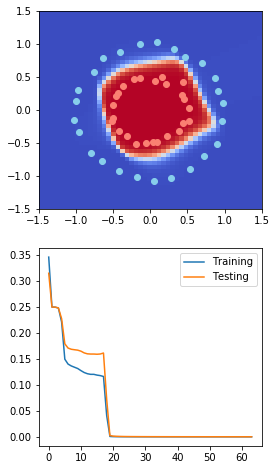

In [25]:
Epochs = int(5e4)

for e in range(Epochs):
    
    Yp = Train(Perceptron1,XTrain,YTrain,Cost,0.1)
    YpT = Predict(Perceptron1, XTest, False) 
    
    if e % 1000 == 0:
        LoosF.append(Cost[0](Yp,YTrain))
        LoosFT.append(Cost[0](YpT,YTest))
        
        GetFig(LoosF[0])
    